In [1]:
import seaborn as sns  
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

df1 = pd.read_csv('steps.csv',  delimiter=';')

1. For analysing purposes some extra colums containing total steps, total days and the mean amount of steps per day/user have been added.

In [2]:
df1["Total steps"] = df1.drop("id", axis=1).sum(axis=1)
df1["Total days used"] = df1.drop("id", axis=1).count(axis=1)
df1["Mean steps per day/users"] = df1.drop(["id", "Total steps","Total days used"],axis=1).mean(axis=1).round(0)

2. Also, the two data sets will be merged together with "id" as the parameter.

In [3]:
df2 = pd.read_csv('survey.csv')

df_new = pd.merge(df1, df2, on = 'id')
df_new.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,Total days used,Mean steps per day/users,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,166,10206.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,164,5687.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,149,8302.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21,3633.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55,5312.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


3. To further analyze the data a boxplot has been plotted.

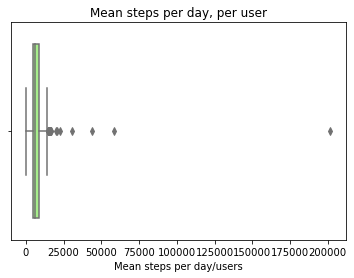

In [4]:
df = df_new
sns.boxplot(x=df["Mean steps per day/users"], color="#a0ff7a")
plt.title("Mean steps per day, per user")
plt.show()

4. The boxplot shows quite some outliers outside of Q4 (right from the box). In order to get a better view on the data these values will be removed from the data set.

In [5]:
df_new["Mean steps per day/users"] = df_new["Mean steps per day/users"]
def outlier(x):
    if(x > 13000): 
        return float('NaN')
    else: 
        return x
df_new["Mean steps per day/users"] = df_new["Mean steps per day/users"].apply(outlier)

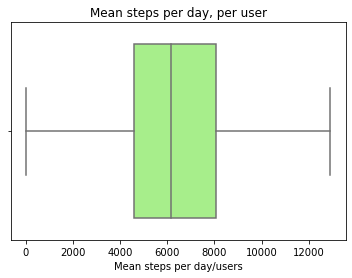

In [6]:
df = df_new
sns.boxplot(x=df["Mean steps per day/users"], color="#a0ff7a")
plt.title("Mean steps per day, per user")
plt.show()

4. After removing the outliers in the data the median is just a bit out of the center, leaning to the left. After also plotting and analyzing the histogram (below), it seems the data is slighty skewed to the right.

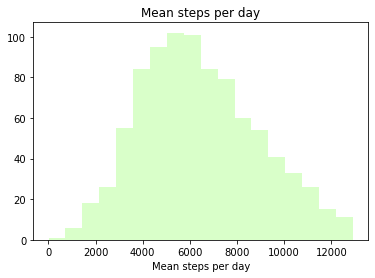

In [7]:
df = df_new
sns.distplot(df["Mean steps per day/users"].dropna(), kde=False, color="#a0ff7a")
plt.title("Mean steps per day")
plt.xlabel("Mean steps per day")
plt.show()

5.The next graphs are going to show the mean steps per day over all individuals. The x and y axis of the data have been switched in order to make the calucation of the mean steps per day. 

In [8]:
df1["Mean steps per day/users"] = df1.drop(["Mean steps per day/users", "Total steps","Total days used"],axis=1)
df = df1.transpose()
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df["date"] = df.index
col = df.pop("date")
df.insert(0, col.name, col)
df = df.reset_index(drop=True)
df["Mean steps per day"] = df.drop(["date"],axis=1).mean(axis=1).round(0)
df.head()

id,date,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,921.0,922.0,923.0,924.0,925.0,926.0,927.0,928.0,929.0,Mean steps per day
0,20-6-2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3642.0
1,21-6-2013,NaN,NaN,11428.0,NaN,NaN,16924.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4571.0,NaN,NaN,NaN,3324.0,9035.0
2,22-6-2013,NaN,10473.0,12523.0,NaN,NaN,14411.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10471.0,NaN,NaN,14411.0,4507.0,10890.0
3,23-6-2013,NaN,705.0,2553.0,NaN,NaN,5121.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5899.0,NaN,1623.0,14364.0,14364.0,7403.0
4,24-6-2013,3941.0,4287.0,190.0,NaN,NaN,29784.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,15295.0,NaN,NaN,26629.0,4098.0,8110.0


6. To further analyze a boxplot has been plotted. Again, a very large outlier in the data. This will be removed and the boxplot will be plotted again.

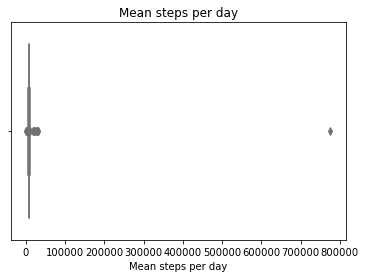

In [9]:
sns.boxplot(x=df["Mean steps per day"], color="#a0ff7a")
plt.title("Mean steps per day")
plt.show()

In [10]:
df["Mean steps per day"] = df["Mean steps per day"]
def outlier(x):
    if(x > 15000): 
        return float('NaN')
    else: 
        return x
df["Mean steps per day"] = df["Mean steps per day"].apply(outlier)

df["Mean steps per day"] = df["Mean steps per day"]
def outlier(x):
    if(x < 5000): 
        return float('NaN')
    else: 
        return x
df["Mean steps per day"] = df["Mean steps per day"].apply(outlier)

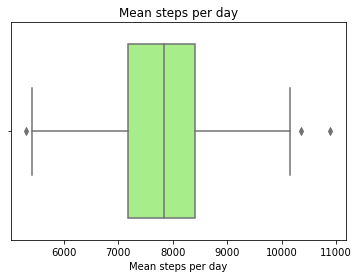

In [11]:
sns.boxplot(x=df["Mean steps per day"], color="#a0ff7a")
plt.title("Mean steps per day")
plt.show()

7. The graph below is showing the amount of steps taken per day by all the participants.

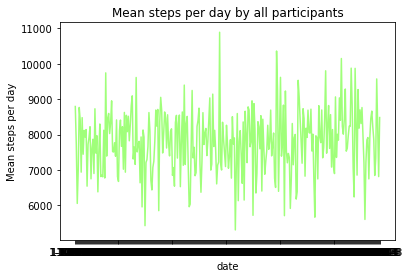

In [13]:
sns.lineplot(x="date", y="Mean steps per day", data=df, color="#a0ff7a")
plt.title("Mean steps per day by all participants")

plt.show()

QUESTION for the reviewer of this notebook: I have the idea something in the data went wrong, but I cannot seem to get an overview of the total data set just to check if my feeling is right. Do you have any advise on how to look at the data set as a whole within Jupyter? Or any other advise on how to review you data after you have taken cleaning/ording steps?